In [1]:
import numpy as np
import pandas as pd

from scipy.stats import ks_2samp, mannwhitneyu, kruskal

from matplotlib import pyplot as plt

In [2]:
def get_median_list(data, debug = True):
    movie_medians = []
    data_as_np = np.asarray(data)
    for movie in range(data_as_np.shape[1]):
        ratings = np.asarray(pd.DataFrame(data_as_np[:,movie]).dropna())
#         print(ratings.flatten() == np.asarray([]))
        movie_medians.append(np.median(ratings))
    movie_medians = np.asarray(movie_medians)
    if debug:
        print("Unique values in medians: ",np.unique(movie_medians))
        print("Number of movies: ",new_movie_medians.shape)
    return movie_medians

In [3]:
data = pd.read_csv('./data/movieReplicationSet.csv')
data.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [4]:
movie_data = data.T[:400].T
movie_data

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN


### Question 1

Are movies that are more popular (operationalized as having more ratings) rated higher than movies that
are less popular?

We can represent the ratings for every movie as their median

In [5]:
number_of_ratings = np.asarray(movie_data.describe().T)[:,0]
median_number_of_ratings = np.median(number_of_ratings)

pop = number_of_ratings > median_number_of_ratings
unpop = ~pop

popular_movies = np.asarray(movie_data)[:,pop]
print("Shape of pop movies subset: ",popular_movies.shape)
unpopular_movies = np.asarray(movie_data)[:,unpop]
print("Shape of unpop movies subset: ",unpopular_movies.shape)

pop_movie_medians = get_median_list(popular_movies, debug = False)
unpop_movie_medians = get_median_list(unpopular_movies, debug = False)

Shape of pop movies subset:  (1097, 200)
Shape of unpop movies subset:  (1097, 200)


In [6]:
print("Median of all medians of ratings of popular movies: ", np.median(pop_movie_medians))
print("Median of all medians of ratings of unpopular movies: ", np.median(unpop_movie_medians))

Median of all medians of ratings of popular movies:  3.0
Median of all medians of ratings of unpopular movies:  2.5


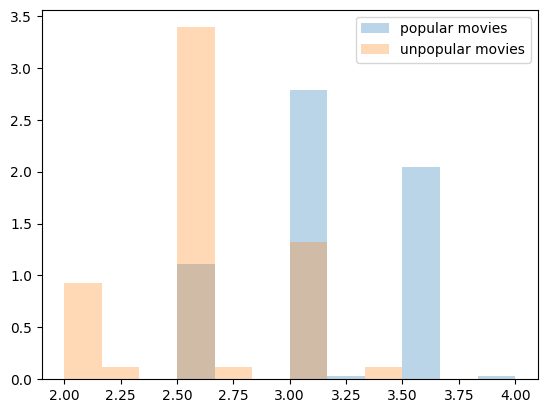

In [7]:
plt.hist(pop_movie_medians, density = True, alpha = 0.3, bins = 9)
plt.hist(unpop_movie_medians, density = True, alpha = 0.3, bins = 9)
plt.legend(['popular movies','unpopular movies'])

In [8]:
# Comparing the medians of pop movies vs medians of unpop movies with Mann Whitney test
u,p = mannwhitneyu(unpop_movie_medians, pop_movie_medians, alternative = 'less')
print(u,p)
if p < 0.005:
    print("The results are significant and popular movies have a higher rating than unpopular ones")
else:
    print("The results are not significant and it can not be concluded that popular movies have a higher rating than unpopular ones")

6572.5 9.929258851707232e-35
The results are significant and popular movies have a higher rating than unpopular ones


In [9]:
# Comparing the medians of pop movies vs medians of unpop movies with KS test
u,p = ks_2samp(pop_movie_medians, unpop_movie_medians, alternative = 'less')
print(u,p)
if p < 0.005:
    print("The results are significant and popular movies have a higher rating than unpopular ones")
else:
    print("The results are not significant and it can not be concluded that popular movies have a higher rating than unpopular ones")

0.575 3.3927482426197853e-31
The results are significant and popular movies have a higher rating than unpopular ones


### Question 2

Are movies that are newer rated differently than movies that are older?

We can represent the ratings for every movie as their median

In [10]:
years = np.asarray([int(i[-5:-1]) for i in movie_data.keys()])
median_year = np.median(years)
print(median_year)

new = years >= median_year
old = ~new

new_movies = np.asarray(movie_data)[:,new]
print("Shape of new movies subset: ",new_movies.shape)
old_movies = np.asarray(movie_data)[:,old]
print("Shape of old movies subset: ",old_movies.shape)

new_movie_medians = get_median_list(new_movies, debug = False)
old_movie_medians = get_median_list(old_movies, debug = False)

1999.0
Shape of new movies subset:  (1097, 203)
Shape of old movies subset:  (1097, 197)


In [11]:
print("Median of all medians of ratings of popular movies: ", np.median(new_movie_medians))
print("Median of all medians of ratings of unpopular movies: ", np.median(old_movie_medians))

Median of all medians of ratings of popular movies:  3.0
Median of all medians of ratings of unpopular movies:  3.0


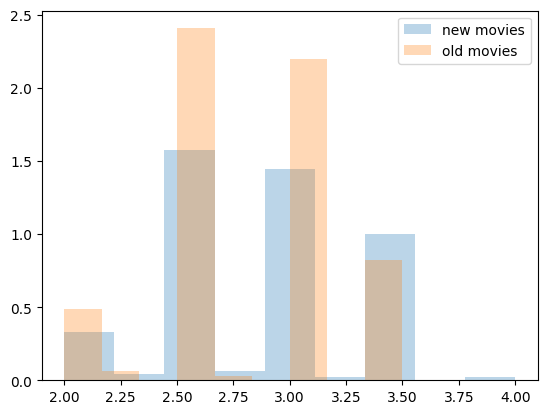

In [12]:
plt.hist(new_movie_medians, density = True, alpha = 0.3, bins = 9)
plt.hist(old_movie_medians, density = True, alpha = 0.3, bins = 9)
plt.legend(['new movies','old movies'])

In [13]:
u,p = mannwhitneyu(old_movie_medians, new_movie_medians)
print(u,p)
if p < 0.005:
    print("The results are significant and new movies have a different distribution than old ones")
else:
    print("The results are not significant and it can not be concluded that new movies have a different distribution than old ones")

18127.5 0.08873661144000093
The results are not significant and it can not be concluded that new movies have a different distribution than old ones


### Question 3

Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?


In [14]:
gender_female = 'Gender identity (1 = female; 2 = male; 3 = self-described)'
np.unique(data[gender_female])

array([ 1.,  2.,  3., nan])

In [15]:
data_female = data[data[gender_female] == 1].T.iloc[:400].T
data_male = data[data[gender_female] == 2].T.iloc[:400].T

In [16]:
shrek_key_index = list(data.keys()).index('Shrek (2001)')

shrek_ratings_female = np.asarray(pd.DataFrame(np.asarray(data_female)[:,shrek_key_index]).dropna()).flatten()
shrek_ratings_male = np.asarray(pd.DataFrame(np.asarray(data_male)[:,shrek_key_index]).dropna()).flatten()

In [17]:
shrek_ratings_female.shape

(743,)

In [18]:
shrek_ratings_male.shape

(241,)

In [19]:
u,p = mannwhitneyu(shrek_ratings_female, shrek_ratings_male)
print("P value of query is: ",p)
if p < 0.005:
    print("The results are significant and ratings of Shrek (2001) are gendered")
else:
    print("The results are not significant and it can not be concluded that ratings of Shrek (2001) are gendered")

P value of query is:  0.050536625925559006
The results are not significant and it can not be concluded that ratings of Shrek (2001) are gendered


In [20]:
u

96830.5

In [21]:
np.unique(shrek_ratings_female)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

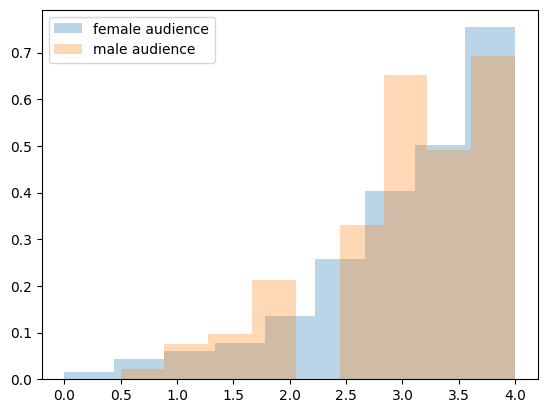

In [22]:
plt.hist(shrek_ratings_female, density = True, alpha = 0.3, bins = 9)
plt.hist(shrek_ratings_male, density = True, alpha = 0.3, bins = 9)
plt.legend(['female audience','male audience'])

### Question 4

What proportion of movies are rated differently by male and female viewers?

In [23]:
count = [0,0]
for movie in data_female.keys():
    movie_female = np.asarray(data_female[movie])
    movie_female = np.asarray(pd.DataFrame(movie_female).dropna())[:,0]

    movie_male = np.asarray(data_male[movie])
    movie_male = np.asarray(pd.DataFrame(movie_male).dropna())[:,0]
        
    p_val_mwu = mannwhitneyu(movie_male, movie_female)[1]
    if p_val_mwu <0.005:
        count[1] += 1

print("Proportion of movies showing a gendered effect is: {}% acc to Mann Whitney".format(100*count[1]/400.0))

Proportion of movies showing a gendered effect is: 12.5% acc to Mann Whitney


### Question 5

Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

In [24]:
only_child = 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)'
np.unique(data[only_child])

array([-1,  0,  1])

In [25]:
data_only = data[data[only_child] == 1].T.iloc[:400].T
data_siblings = data[data[only_child] == 0].T.iloc[:400].T

lion_king_key_index = list(data.keys()).index('The Lion King (1994)')

lk_ratings_only = np.asarray(pd.DataFrame(np.asarray(data_only)[:,lion_king_key_index]).dropna()).flatten()
lk_ratings_siblings = np.asarray(pd.DataFrame(np.asarray(data_siblings)[:,lion_king_key_index]).dropna()).flatten()


u,p = mannwhitneyu(lk_ratings_siblings, lk_ratings_only, alternative = 'less')
print(u,p)
if p < 0.005:
    print("The results are significant and ratings of The Lion King (1994) are higher for only children than children with siblings")
else:
    print("The results are not significant and it can not be concluded that ratings of The Lion King (1994) are higher for only children than children with siblings")

64247.0 0.978419092554931
The results are not significant and it can not be concluded that ratings of The Lion King (1994) are higher for only children than children with siblings


In [26]:
lk_ratings_only.shape

(151,)

In [27]:
np.median(lk_ratings_only)

3.5

In [28]:
lk_ratings_siblings.shape

(776,)

In [29]:
np.median(lk_ratings_siblings)

4.0

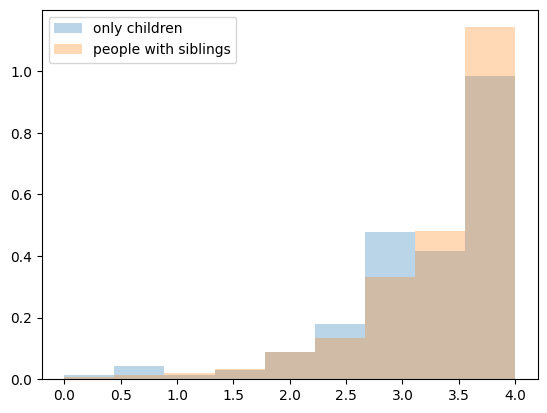

In [30]:
plt.hist(lk_ratings_only, density = True, alpha = 0.3, bins = 9)
plt.hist(lk_ratings_siblings, density = True, alpha = 0.3, bins = 9)
plt.legend(['only children','people with siblings'])

### Question 6

What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings
vs. those without?

In [31]:
count = [0,0]
for movie in data_female.keys():
    movie_only = np.asarray(data_only[movie])
    movie_only = np.asarray(pd.DataFrame(movie_only).dropna())[:,0]

    movie_siblings = np.asarray(data_siblings[movie])
    movie_siblings = np.asarray(pd.DataFrame(movie_siblings).dropna())[:,0]
    
    p_val_mwu = mannwhitneyu(movie_siblings, movie_only)[1]
    if p_val_mwu <0.005:
        count[1] += 1

print("Proportion of movies showing a only child effect is: {}% acc to Mann Whitney".format(100*count[1]/400.0))

Proportion of movies showing a only child effect is: 1.75% acc to Mann Whitney


In [32]:
count

[0, 7]

#### Question 7

Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who
prefer to watch them alone?

In [33]:
watch_alone = 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'
np.unique(data[watch_alone])

array([-1,  0,  1])

In [34]:
data_socially = data[data[watch_alone] == 0].T.iloc[:400].T
data_solo = data[data[watch_alone] == 1].T.iloc[:400].T

wolf_key_index = list(data.keys()).index('The Wolf of Wall Street (2013)')

wolf_ratings_socially = np.asarray(pd.DataFrame(np.asarray(data_socially)[:,wolf_key_index]).dropna()).flatten()
wolf_ratings_solo = np.asarray(pd.DataFrame(np.asarray(data_solo)[:,wolf_key_index]).dropna()).flatten()


u,p = mannwhitneyu(wolf_ratings_solo, wolf_ratings_socially, alternative = 'less')
print(u,p)
if p < 0.005:
    print("The results are significant and ratings of The Wolf of Wall Street (2013) are higher for social watchers than solo watchers")
else:
    print("The results are not significant and it can not be concluded that ratings of The Wolf of Wall Street (2013) are higher for social watchers than solo watchers")

56806.5 0.9436657996253056
The results are not significant and it can not be concluded that ratings of The Wolf of Wall Street (2013) are higher for social watchers than solo watchers


In [35]:
np.median(wolf_ratings_socially)

3.0

In [36]:
np.median(wolf_ratings_solo)

3.5

In [37]:
wolf_ratings_socially.shape

(270,)

In [38]:
wolf_ratings_solo.shape

(393,)

In [39]:
np.unique(wolf_ratings_socially)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

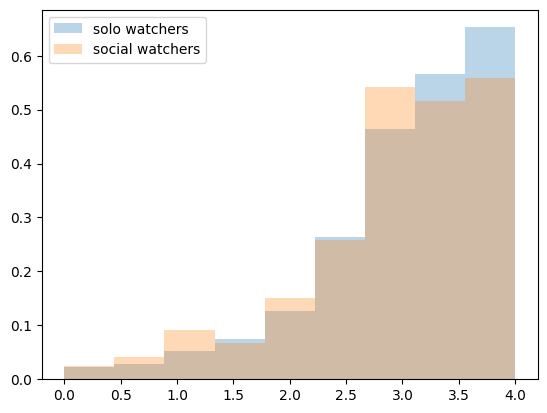

In [40]:
plt.hist(wolf_ratings_solo, density = True, alpha = 0.3, bins = 9)
plt.hist(wolf_ratings_socially, density = True, alpha = 0.3, bins = 9)
plt.legend(['solo watchers','social watchers'])

#### Question 8

What proportion of movies exhibit such a “social watching” effect?

In [41]:
count = [0,0]
for movie in movie_data.keys():
    movie_solo = np.asarray(data_solo[movie])
    movie_solo = np.asarray(pd.DataFrame(movie_solo).dropna())[:,0]

    movie_socially = np.asarray(data_socially[movie])
    movie_socially = np.asarray(pd.DataFrame(movie_socially).dropna())[:,0]
        
    p_val_mwu = mannwhitneyu(movie_solo, movie_socially, alternative = 'less')[1]
#     print(round(p_val_mwu,3))
    if p_val_mwu <0.005:
        count[1] += 1

print("Proportion of movies showing a social effect is: {}% acc to Mann Whitney".format(100*count[1]/400.0))

Proportion of movies showing a social effect is: 1.5% acc to Mann Whitney


In [42]:
count

[0, 6]

#### Question 9

Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

In [43]:
ha = np.asarray(movie_data['Home Alone (1990)'].dropna())
fn = np.asarray(movie_data['Finding Nemo (2003)'].dropna())

d,p = ks_2samp(ha, fn)
print(d,p)

if p < 0.005:
    print("The results are significant and rating distributions are different")
else:
    print("The results are not significant and it can not be concluded that ratings distributions are different")

0.15269080020897632 6.379397182836346e-10
The results are significant and rating distributions are different


In [44]:
print(ha.shape, np.median(ha))

(857,) 3.5


In [45]:
print(fn.shape, np.median(fn))

(1014,) 3.5


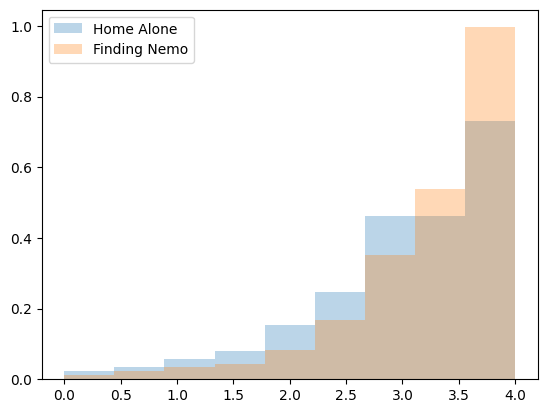

In [46]:
plt.hist(ha, density = True, alpha = 0.3, bins = 9)
plt.hist(fn, density = True, alpha = 0.3, bins = 9)
plt.legend(['Home Alone','Finding Nemo'])

#### Question 10

There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana
Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these
are of inconsistent quality, as experienced by viewers?

In [47]:
franchises = "Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman".split("’, ‘")

In [48]:
movies_in_franchises = {}
for franchise in franchises:
    movies = []
    for i in list(movie_data.keys()):
        if i[:len(franchise)] == franchise:
            movies.append(i)
    movies_in_franchises[franchise] = movies

In [49]:
movies_in_franchises

{'Star Wars': ['Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode II - Attack of the Clones (2002)',
  'Star Wars: Episode V - The Empire Strikes Back (1980)',
  'Star Wars: Episode 1 - The Phantom Menace (1999)',
  'Star Wars: Episode VII - The Force Awakens (2015)',
  'Star Wars: Episode VI - The Return of the Jedi (1983)'],
 'Harry Potter': ["Harry Potter and the Sorcerer's Stone (2001)",
  'Harry Potter and the Deathly Hallows: Part 2 (2011)',
  'Harry Potter and the Goblet of Fire (2005)',
  'Harry Potter and the Chamber of Secrets (2002)'],
 'The Matrix': ['The Matrix Revolutions (2003)',
  'The Matrix Reloaded (2003)',
  'The Matrix (1999)'],
 'Indiana Jones': ['Indiana Jones and the Last Crusade (1989)',
  'Indiana Jones and the Temple of Doom (1984)',
  'Indiana Jones and the Raiders of the Lost Ark (1981)',
  'Indiana Jones and the Kingdom of the Crystal Skull (2008)'],
 'Jurassic Park': ['Jurassic Park III (2001)', 'Jurassic Park (1993)'],
 'Pirates of the Ca

In [50]:
count = 0
for franchise in movies_in_franchises:
    l = len(movies_in_franchises[franchise])
    print(l)
    count += l
print(count)

6
4
3
4
2
3
3
3
28


In [51]:
for franchise in movies_in_franchises:
    franchise_ratings = movie_data[movies_in_franchises[franchise]]
    franchise_ratings = [np.asarray(franchise_ratings[i].dropna()) for i in list(franchise_ratings.keys())]
#     print(franchise_ratings)
    stat, p = kruskal(*franchise_ratings)
    print("\n\n",franchise,"\n")
    print(stat,p)
    if p < 0.005:
        print("Significant, movies are rated differently")
    else:
        print("Not Significant, movies are rated similarly")
    



 Star Wars 

230.5841753686405 8.01647736660335e-48
Significant, movies are rated differently


 Harry Potter 

3.331230732890868 0.34331950837289205
Not Significant, movies are rated similarly


 The Matrix 

48.378866521305774 3.1236517880781424e-11
Significant, movies are rated differently


 Indiana Jones 

45.79416340261569 6.27277563979608e-10
Significant, movies are rated differently


 Jurassic Park 

45.17505738323164 1.8018542092238714e-11
Significant, movies are rated differently


 Pirates of the Caribbean 

20.64399756002606 3.2901287079094474e-05
Significant, movies are rated differently


 Toy Story 

24.38599493626327 5.065805156537524e-06
Significant, movies are rated differently


 Batman 

190.53496872634642 4.2252969509030006e-42
Significant, movies are rated differently


#### End of questions
<br>
<br>
<br>
<br>

### Extra Credit Question
<br>
<br>

Question: Do people who watch more movies rate movies differently than the people who watch less movies?<br>
i.e. is there a 'movie experience effect' on the ratings?

In [52]:
num_movies_rated = np.asarray(movie_data.T.describe())[0]
data['Number of movies rated'] = num_movies_rated
# data

In [54]:
median_num_movies_rated = np.median(num_movies_rated)
print("median of the number of movies watched by users: ",median_num_movies_rated)

freq = "Number of movies rated"
data_freq = data[data[freq] > median_num_movies_rated].T.iloc[:400].T
data_rare = data[data[freq] <= median_num_movies_rated].T.iloc[:400].T

freq_movie_medians = get_median_list(np.asarray(data_freq), debug = False)
rare_movie_medians = get_median_list(np.asarray(data_rare), debug = False)

valid_r = np.unique(rare_movie_medians)[:-1]
valid_f = np.unique(freq_movie_medians)

values_in_r = np.asarray([(i in valid_r) for i in rare_movie_medians])
values_in_f = np.asarray([(i in valid_f) for i in freq_movie_medians])
common =  values_in_r * values_in_f


r,f = [],[]
for i in range(rare_movie_medians.shape[0]):
    if common[i]:
        r.append(rare_movie_medians[i])
        f.append(freq_movie_medians[i])

rare_movie_medians = np.asarray(r)
freq_movie_medians = np.asarray(f)

u,p = ks_2samp(freq_movie_medians, rare_movie_medians)
print(u,p)
if p < 0.005:
    print("The results are significant and rating pattern of frequent watchers is different from that of rare watchers")
else:
    print("The results are not significant and it can not be concluded that rating pattern of frequent watchers is different from that of rare watchers")

median of the number of movies watched by users:  81.0
0.3194805194805195 9.024941766629605e-18
The results are significant and rating pattern of frequent watchers is different from that of rare watchers


In [55]:
np.median(rare_movie_medians)

3.0

In [56]:
rare_movie_medians.shape

(385,)

In [57]:
np.median(freq_movie_medians)

3.0

In [58]:
freq_movie_medians.shape

(385,)

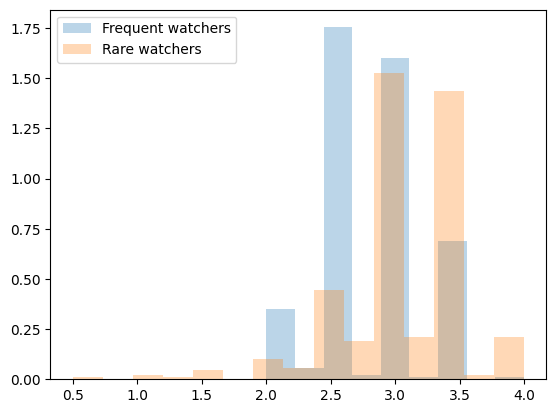

In [59]:
plt.hist(freq_movie_medians, density = True, alpha = 0.3, bins = 9)
plt.hist(rare_movie_medians, density = True, alpha = 0.3, bins = 15)
plt.legend(['Frequent watchers','Rare watchers'])

#### Extra Credit Question 2:

What proportion of movies show a criticism effect?
criticism effect: Do people who tend to find fault with others rate the movie differently from those who do not

In [60]:
median_criticism = np.median(data['Tends to find fault with others'].dropna())

In [61]:
how_critical = 'Tends to find fault with others'

# We use >= for critical data because people tend not to call themselves nit-picky, so they tend to understate their criticism ratings

data_critical = data[data[how_critical] >= median_criticism].T.iloc[:400].T
data_not_critical = data[data[how_critical] < median_criticism].T.iloc[:400].T
count = [0,0]
for movie in data_critical.keys():
    movie_critical = np.asarray(data_critical[movie])
    movie_critical = np.asarray(pd.DataFrame(movie_critical).dropna())[:,0]

    movie_not_critical = np.asarray(data_not_critical[movie])
    movie_not_critical = np.asarray(pd.DataFrame(movie_not_critical).dropna())[:,0]
        
    p_val_mwu = mannwhitneyu(movie_not_critical, movie_critical)[1]
    if p_val_mwu <0.005:
        count[1] += 1

print("Proportion of movies showing a criticism effect is: {}% acc to Mann Whitney".format(100*count[1]/400.0))

Proportion of movies showing a criticism effect is: 0.75% acc to Mann Whitney


In [62]:
count

[0, 3]

In [63]:
# Shifting the alpha level from 0.005 to 0.05
how_critical = 'Tends to find fault with others'

data_critical = data[data[how_critical] >= median_criticism].T.iloc[:400].T
data_not_critical = data[data[how_critical] < median_criticism].T.iloc[:400].T
count = [0,0]
for movie in data_critical.keys():
    movie_critical = np.asarray(data_critical[movie])
    movie_critical = np.asarray(pd.DataFrame(movie_critical).dropna())[:,0]

    movie_not_critical = np.asarray(data_not_critical[movie])
    movie_not_critical = np.asarray(pd.DataFrame(movie_not_critical).dropna())[:,0]
        
    p_val_mwu = mannwhitneyu(movie_not_critical, movie_critical)[1]
    if p_val_mwu <0.05:
        count[1] += 1

print("Proportion of movies showing a criticism effect is: {}% acc to Mann Whitney".format(100*count[1]/400.0))

Proportion of movies showing a criticism effect is: 9.5% acc to Mann Whitney
